In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

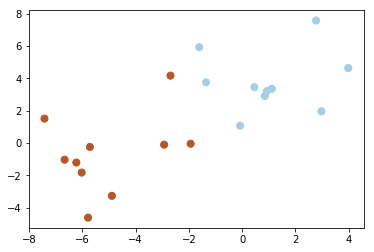

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [3]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):
    
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    
    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])
        
    if boundary:
        level = [0]
        
        if type == "probability":
            level = [0.5]
        
        plt.contour(XX, YY, Z,
                   colors='k', linestyles='-', levels=level)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


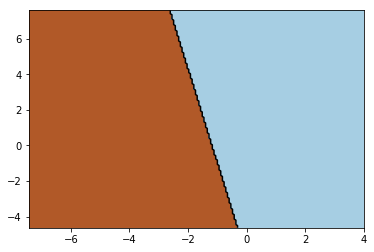

In [5]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

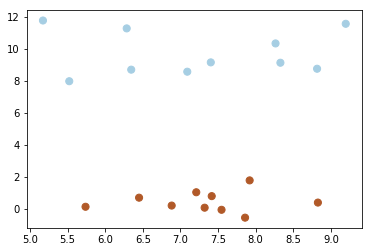

In [6]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=8
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


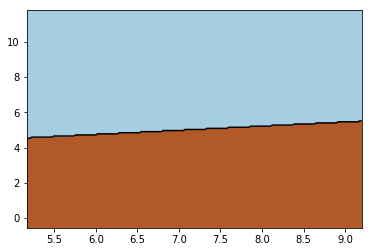

In [7]:
clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


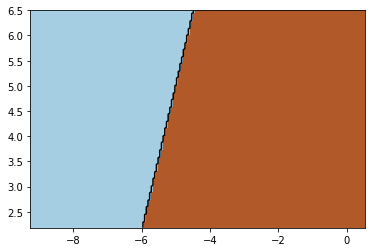

In [8]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=7
                 )

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


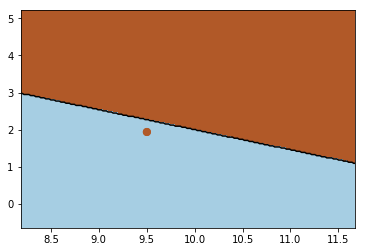

In [9]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=4
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

In [10]:
def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    
    colors = ['k'] * 3
    linestyles = ['-'] * 3
    levels = [-1, 0, 1]
    
    plt.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=80, facecolors='none')
    
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    if mesh:
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, zorder=-10)
    if boundary:
        plt.contour(XX, YY, Z,
                    linestyles=linestyles,
                    levels=levels)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

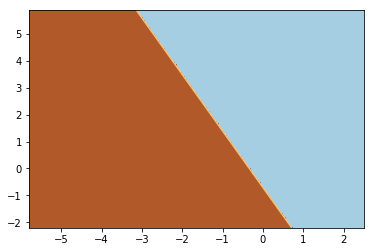

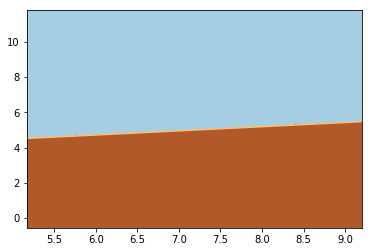

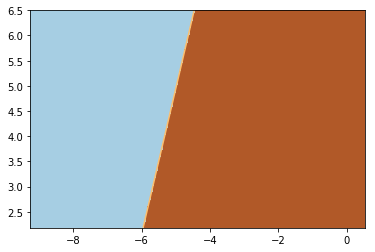

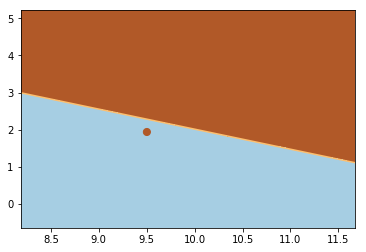

In [11]:
clf = SVC(kernel='linear')

for rs in [3, 8, 7, 4]:
    
    X, y = make_blobs(n_samples=20,
                      n_features=2,
                      centers=2,
                      cluster_std=1,
                      random_state=rs
                     )
    clf.fit(X, y)
    
    plotSVMBoundary(X, clf)
    
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    
    plt.show()

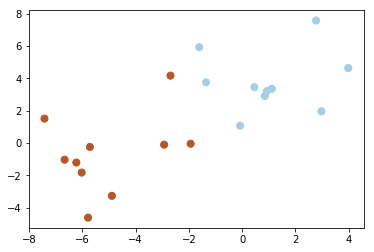

In [12]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std = 2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


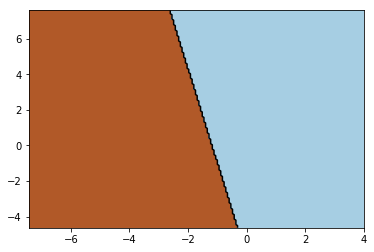

In [13]:
clf.probability = True
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

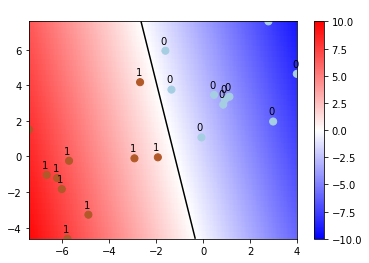

In [14]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf, type="value", clim=(-10, 10))

for l, dx, dy in zip(y, X[:, 0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4))

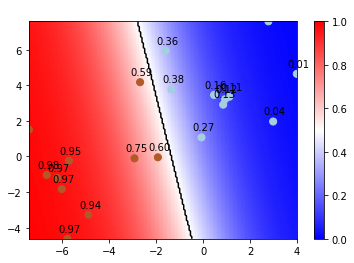

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf, type="probability", clim=(0, 1))

X_test_value = np.exp(clf.predict_log_proba(X))[:, 1]

for l, dx, dy in zip(X_test_value, X[:, 0], X[:, 1]):
    plt.annotate("{0:.2f}".format(l), xy=(dx-0.4, dy+0.4))

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


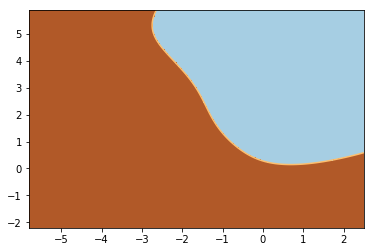

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


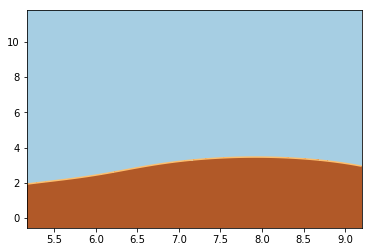

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


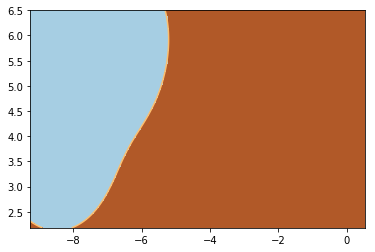

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


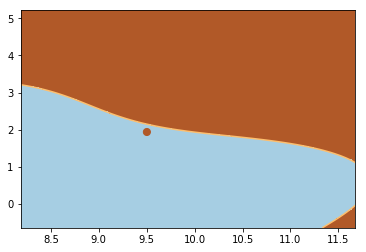

In [16]:
for rs in [3, 8, 7, 4]:
    
    X, y = make_blobs(n_samples=20,
                      n_features=2,
                      centers=2,
                      cluster_std=1,
                      random_state=rs
                     )
    
    clf.kernel = 'rbf'
    
    clf.fit(X, y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    
    plt.show()

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


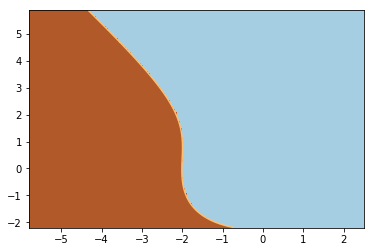

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


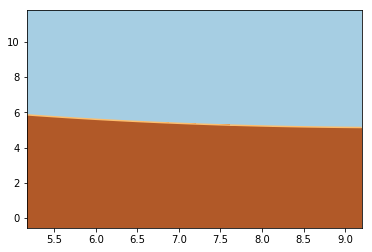

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


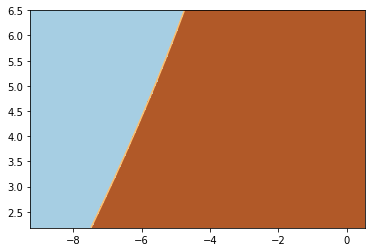

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


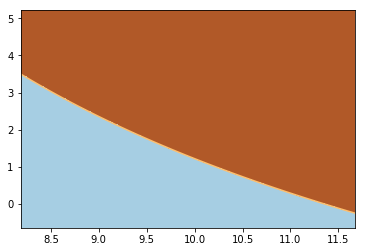

In [17]:
for rs in [3, 8, 7, 4]:
    X, y = make_blobs(n_samples=20,
                      n_features=2,
                      centers=2,
                      cluster_std=1,
                      random_state=rs
                     )
    clf.kernel = 'poly'
    
    clf.fit(X, y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    
    plt.show()

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


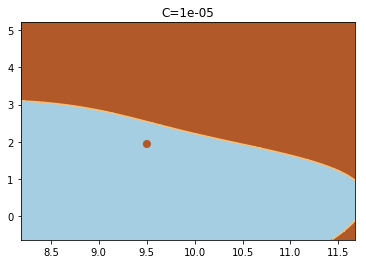

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


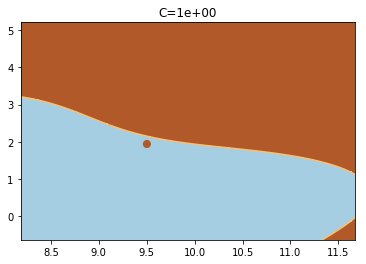

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


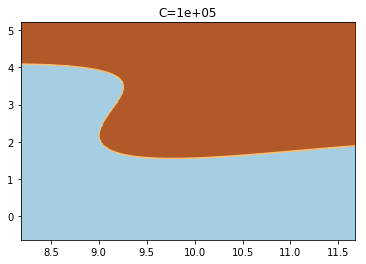

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


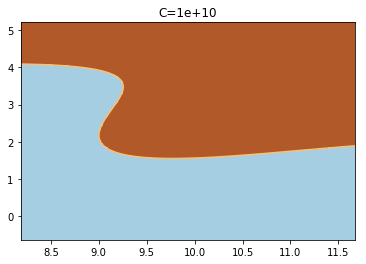

In [18]:
for C in [1e-5, 1, 1e5, 1e10]:
    
    X, y = make_blobs(n_samples=20,
                      n_features=2,
                      centers=2,
                      cluster_std=1,
                      random_state=4
                     )
    
    clf.kernel='rbf'
    
    clf.C = C
    clf.fit(X, y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [21]:
clf = SVC()

In [23]:
clf.kernel = 'linear'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [24]:
clf.kernel = 'rbf'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5877192982456141

In [ ]:
clf.kernel = 'poly'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
